# Diplomatura en ciencia de datos, aprendizaje automático y sus aplicaciones - Edición 2023 - FAMAF (UNC)

## Procesamiento digital de imágenes

### Trabajo práctico entregable

**Integrante:**
- [Chevallier-Boutell, Ignacio José](https://www.linkedin.com/in/nachocheva/)


**Importante:** para obtener los créditos de materia completa, resolver al menos 1 ejercicio optativo de cada trabajo práctico.

---

## Librerías

In [1]:
import imageio.v3 as iio
import numpy as np
import matplotlib.pyplot as plt

## Imagénes a usar

Se utilizará alguna de las imágenes a continuación, extraídas de la documentación de imageio.

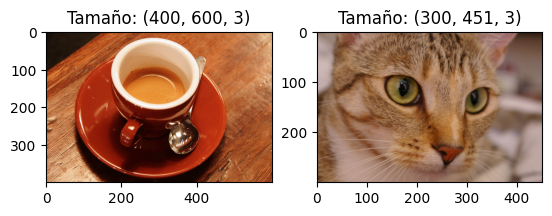

In [2]:
# Image of a cup of coffee (Rachel Michetti)
cafe = iio.imread('imageio:coffee.png')

# Image of Stefan’s cat
cat = iio.imread('imageio:chelsea.png')

fig, axs = plt.subplots(1, 2)

axs[0].imshow(cafe)
axs[0].set_title(f'Tamaño: {cafe.shape}')
axs[1].imshow(cat)
axs[1].set_title(f'Tamaño: {cat.shape}')

plt.show()

## Cambio de base

In [3]:
# Matriz de cambio de base: de RGB a YIQ 
RGB2YIQ = np.array([[0.299,     0.587,     0.114],
                    [0.595716, -0.274453, -0.321263],
                    [0.211456, -0.522591,  0.311135]])

# Matriz de cambio de base: de YIQ a RGB 
YIQ2RGB = np.array([[1,  0.9663,  0.6210],
                    [1, -0.2721, -0.6474],
                    [1, -1.1070,  1.7046]])

def rot_base(img, M):
    return np.matmul( img.reshape((-1,3)), M.T ).reshape(img.shape)

---
# Ejercicio 1

## Ejercicio 1.1
La propuesta para esta actividad consiste en manipular independientemente la luminancia y la saturación de una imagen.
Para ello convertimos cada pixel de la imagen del espacio RGB al espacio YIQ, luego alteramos los valores de Y (para cambiar la luminancia) o de IQ (para cambiar la saturación).
Con los nuevos valores de YIQ, convertimos a RGB nuevamente y obtenemos una nueva imagen.

### Variación de luminancia

In [4]:
def change_lum(img, alpha):
    '''
    Modifica la luminancia de la imagen img según alpha.
    Al final se compara la imagen original junto a la modificada.
    '''

    # Normalizamos los valores de RGB
    img_norm  = img / 255

    # Nos vamos a YIQ
    img_YIQ = rot_base(img_norm, RGB2YIQ)

    # Modificamos la luminancia según alfa
    img_YIQ[:,:,0] = np.clip(img_YIQ[:,:,0] * alpha, 0 , 1)

    # Volvemos a RGB
    img_RGB = np.clip(rot_base(img_YIQ, YIQ2RGB), 0, 1)

    # Graficamos comparativamente
    _, axs = plt.subplots(1, 2)

    axs[0].imshow(img)
    axs[0].set_title('Imagen original')
    axs[1].imshow(img_RGB)
    axs[1].set_title(f'Cambio en luminacia: {alpha:.2f}')

    plt.show()

#### Efectos sobre la foto del café

Aumentamos la luminancia en un 75%


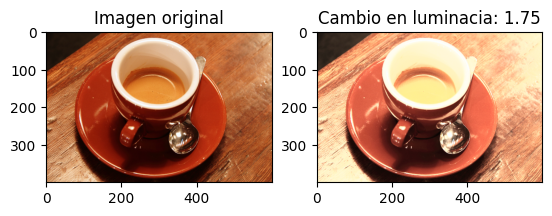

Disminuimos la luminancia en un 75%


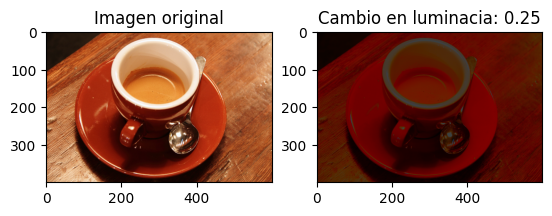

Variamos la luminancia aleatoriamente entre un 0% y un 200%


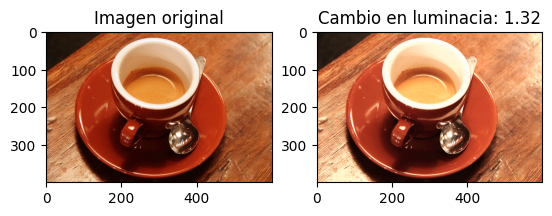

In [10]:
print('Aumentamos la luminancia en un 75%')
change_lum(cafe, 1.75)

print('Disminuimos la luminancia en un 75%')
change_lum(cafe, 0.25)

print('Variamos la luminancia aleatoriamente entre un 0% y un 200%')
change_lum(cafe, np.random.uniform(0,2))

#### Efectos sobre la foto del gato

Aumentamos la luminancia en un 75%


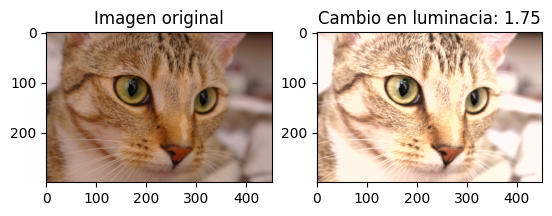

Disminuimos la luminancia en un 75%


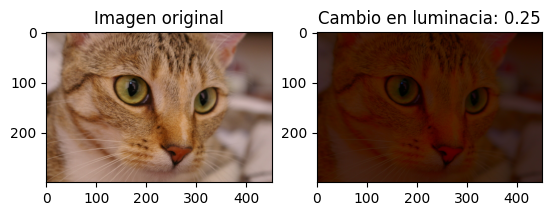

Variamos la luminancia aleatoriamente entre un 0% y un 200%


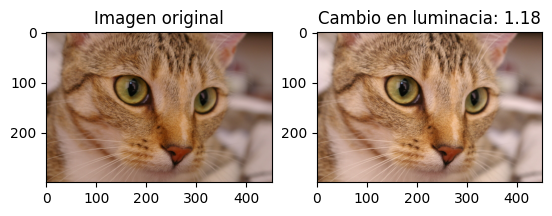

In [6]:
print('Aumentamos la luminancia en un 75%')
change_lum(cat, 1.75)

print('Disminuimos la luminancia en un 75%')
change_lum(cat, 0.25)

print('Variamos la luminancia aleatoriamente entre un 0% y un 200%')
change_lum(cat, np.random.uniform(0,2))

### Variación de cromaticidad

In [7]:
def change_crom(img, beta):
    '''
    Modifica la cromaticidad de la imagen img según beta.
    Al final se compara la imagen original junto a la modificada.
    '''

    # Normalizamos los valores de RGB
    img_norm  = img / 255

    # Nos vamos a YIQ
    img_YIQ = rot_base(img_norm, RGB2YIQ)

    # Modificamos la cromaticidad según beta en I
    img_YIQ[:,:,1] = np.clip(img_YIQ[:,:,1] * beta, -0.5957, 0.5957)

    # Modificamos la cromaticidad según beta en Q
    img_YIQ[:,:,2] = np.clip(img_YIQ[:,:,2] * beta, -0.5226, 0.5226)

    # Volvemos a RGB
    img_RGB = np.clip(rot_base(img_YIQ, YIQ2RGB), 0, 1)

    # Graficamos comparativamente
    _, axs = plt.subplots(1, 2)

    axs[0].imshow(img)
    axs[0].set_title('Imagen original')
    axs[1].imshow(img_RGB)
    axs[1].set_title(f'Cambio en cromaticidad: {beta:.2f}')

    plt.show()

#### Efectos sobre la foto del cafe

Aumentamos la cromaticidad en un 75%


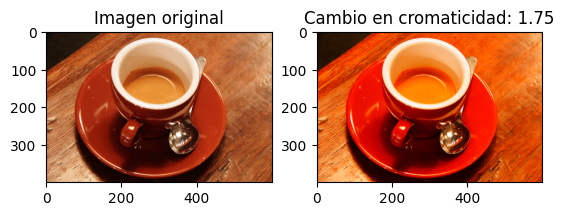

Disminuimos la cromaticidad en un 75%


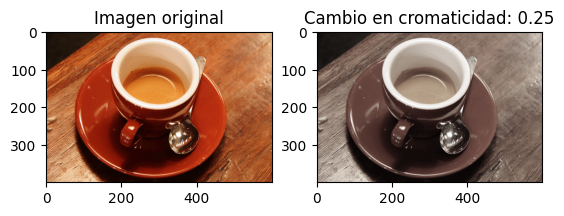

Variamos la cromaticidad aleatoriamente entre un 0% y un 200%


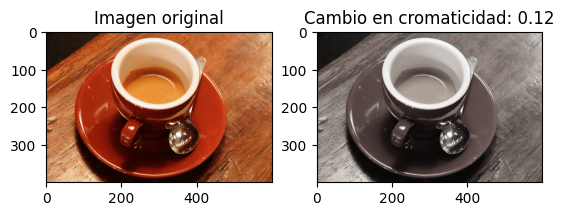

In [8]:
print('Aumentamos la cromaticidad en un 75%')
change_crom(cafe, 1.75)

print('Disminuimos la cromaticidad en un 75%')
change_crom(cafe, 0.25)

print('Variamos la cromaticidad aleatoriamente entre un 0% y un 200%')
change_crom(cafe, np.random.uniform(0,2))

#### Efectos sobre la foto del gato

Aumentamos la cromaticidad en un 75%


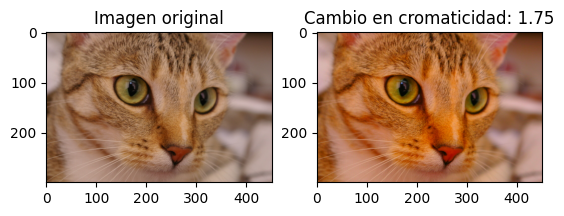

Disminuimos la cromaticidad en un 75%


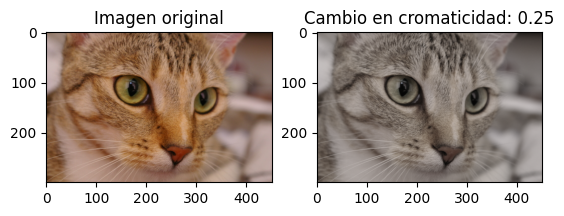

Variamos la cromaticidad aleatoriamente entre un 0% y un 200%


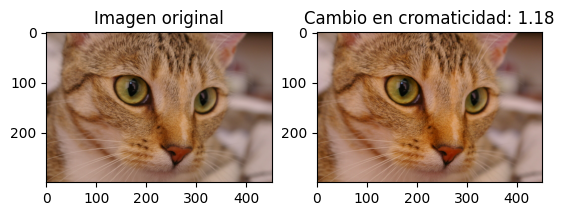

In [9]:
print('Aumentamos la cromaticidad en un 75%')
change_crom(cat, 1.75)

print('Disminuimos la cromaticidad en un 75%')
change_crom(cat, 0.25)

print('Variamos la cromaticidad aleatoriamente entre un 0% y un 200%')
change_crom(cat, np.random.uniform(0,2))

## Ejercicio 1.2
Desarrollar un aplicativo o notebook que pueda abrir una imagen, manipule su histograma de luminancias, y luego ver la imagen procesada. Se debe poder elegir filtro raíz, cuadrado, o lineal a trozos.
Los controles para elegir los filtros los organizan como les resulte más cómodo.